<a href="https://colab.research.google.com/github/Abhi-008-sh/MLGLab/blob/main/1BM22CS008_Lab_7_SVM_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RBF Kernel Accuracy: 1.0
RBF Kernel Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Linear Kernel Accuracy: 1.0
Linear Kernel Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


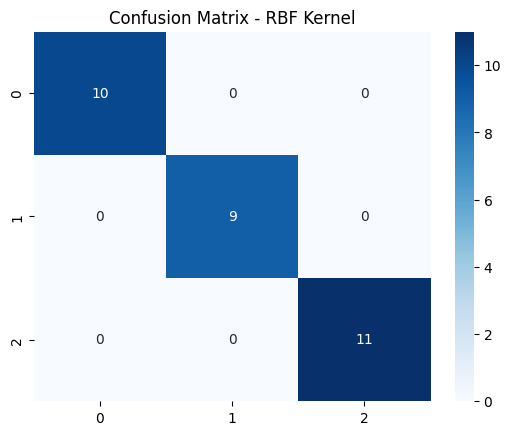

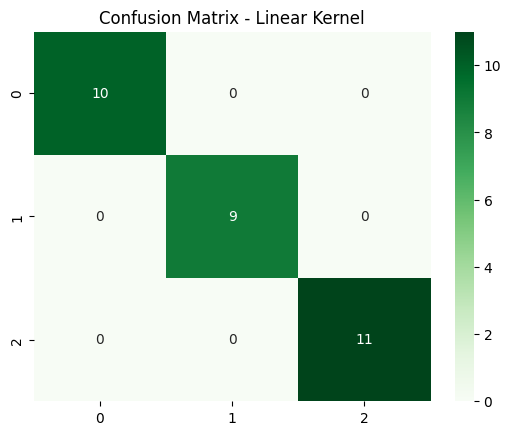

In [6]:
# SVM on IRIS dataset with RBF and Linear kernels

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris_df = pd.read_csv('/content/iris (1) (1).csv')

# Assume last column is the target
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test using RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("RBF Kernel Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

# Train and test using Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Linear Kernel Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

# Optional: plot confusion matrices
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RBF Kernel')
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Linear Kernel')
plt.show()


Drug Dataset SVM Accuracy: 0.8545
Drug Dataset Confusion Matrix:
 [[140   1   0   0   0   0   2   0   0   2   0   0   0   0   0   0   0   1
    1   0   0   1   0   0   1   0]
 [  1 133   0   3   0   0   0   5   0   0   1   0   0   1   0   1   0   6
    1   0   0   1   0   0   0   0]
 [  0   0 117   0   1   0   4   2   0   0   6   1   0   0   3   0   0   0
    1   0   2   0   0   0   0   0]
 [  0   6   0 141   0   0   0   2   0   1   2   0   0   1   1   0   0   0
    0   2   0   0   0   0   0   0]
 [  0   1   2   0 127   0   4   0   0   0   1   1   0   0   0   0   1   1
    2   1   0   0   0   0   0   0]
 [  0   0   0   0   3 127   0   1   2   1   0   0   0   0   0   1   0   0
    2   3   0   0   0   0   0   0]
 [  0   1   8   2   0   0 129   2   0   1   3   0   0   0   0   0   7   1
    2   0   0   2   2   0   0   0]
 [  1   4   1  10   1   2   0  85   0   3   6   0   0   2  10   1   2  12
    0   0   2   0   0   1   1   0]
 [  0   0   0   3   0   2   0   0 127   6   0   2   0   0   0 

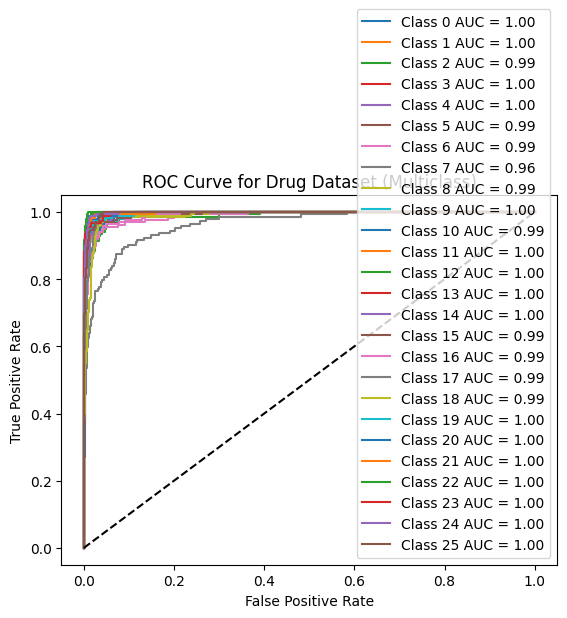

Macro AUC Score: 0.994042398678708


In [7]:
# SVM on Drug dataset (letter recognition)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the drug dataset
drug_df = pd.read_csv("/content/letter-recognition.csv")

# Encode categorical labels if necessary
X = drug_df.iloc[:, 1:]  # Assuming first column is target
y = drug_df.iloc[:, 0]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Binarize for ROC curve (multi-class)
y_bin = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_bin.shape[1]

# Split the dataset
X_train, X_test, y_train, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Train an SVM with linear kernel for ROC purposes
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train.argmax(axis=1))
y_score = svm_model.predict_proba(X_test)

# Predict class labels
y_pred = svm_model.predict(X_test)
y_true = y_test_bin.argmax(axis=1)

# Accuracy and Confusion Matrix
print("Drug Dataset SVM Accuracy:", accuracy_score(y_true, y_pred))
print("Drug Dataset Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# ROC and AUC for multi-class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Plot ROC Curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} AUC = {roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Drug Dataset (Multiclass)")
plt.legend(loc="lower right")
plt.show()

# Print macro AUC
macro_auc = roc_auc_score(y_test_bin, y_score, average="macro")
print("Macro AUC Score:", macro_auc)


Accuracy: 0.9788029925187033
Confusion Matrix:
 [[161   0   1   0   0]
 [  1 160   0   0   1]
 [  0   0 171   1   0]
 [  3   0   2 154   0]
 [  0   7   0   1 139]]


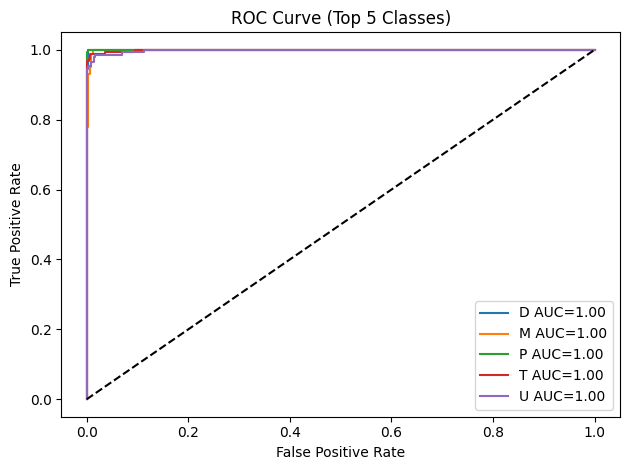

Macro AUC Score: 0.9991664620671736


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/letter-recognition.csv")

# Use only top 5 most frequent classes to reduce computation
top_classes = df['letter'].value_counts().head(5).index.tolist()
df = df[df['letter'].isin(top_classes)]

# Features and target
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Binarize labels for ROC
y_bin = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_bin.shape[1]

# Train-test split
X_train, X_test, y_train, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Train SVM with linear kernel
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train.argmax(axis=1))
y_score = svm_model.predict_proba(X_test)

# Predict class labels
y_pred = svm_model.predict(X_test)
y_true = y_test_bin.argmax(axis=1)

# Accuracy and confusion matrix
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Fast ROC curve (limited to top 5 classes)
plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f"{label_encoder.inverse_transform([i])[0]} AUC={auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (Top 5 Classes)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Macro AUC
macro_auc = roc_auc_score(y_test_bin, y_score, average="macro")
print("Macro AUC Score:", macro_auc)

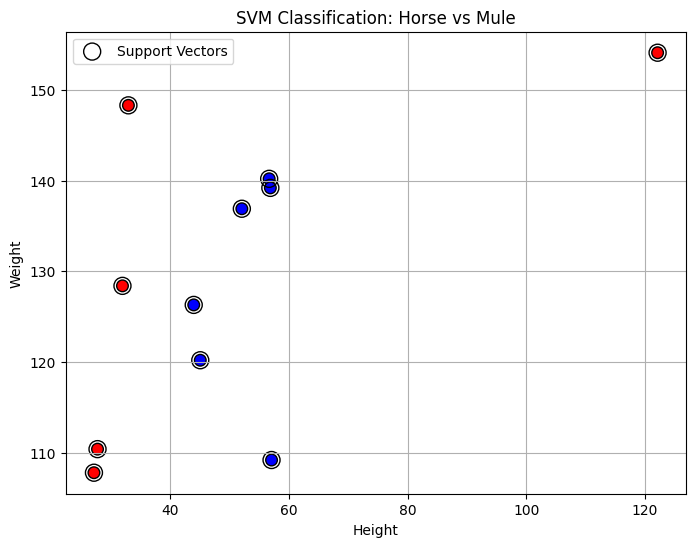

Accuracy: 0.9090909090909091
Support Vectors:
 [[ 44.  126.3]
 [ 52.1 136.9]
 [ 57.1 109.2]
 [ 45.1 120.2]
 [ 56.7 140.2]
 [ 56.9 139.2]
 [ 33.  148.3]
 [ 27.8 110.4]
 [ 27.2 107.8]
 [ 32.  128.4]
 [122.1 154.1]]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

# Step 1: Create dataset
data = {
    "Height": [44.0, 52.1, 57.1, 33.0, 27.8, 27.2, 32.0, 45.1, 56.7, 56.9, 122.1],
    "Weight": [126.3, 136.9, 109.2, 148.3, 110.4, 107.8, 128.4, 120.2, 140.2, 139.2, 154.1],
    "Label":  ["Horse", "Horse", "Horse", "Mule", "Mule", "Mule", "Mule", "Horse", "Horse", "Horse", "Mule"]
}
df = pd.DataFrame(data)

# Step 2: Save CSV
df.to_csv("horses_mules_dataset.csv", index=False)

# Step 3: Load dataset
df = pd.read_csv("horses_mules_dataset.csv")

# Step 4: Preprocess data
X = df[["Height", "Weight"]].values
y = df["Label"].map({"Horse": 0, "Mule": 1}).values  # Convert to numeric

# Step 5: Train SVM model
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Step 6: Plot data and support vectors
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=70, edgecolors='k')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("SVM Classification: Horse vs Mule")

# Plot support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Accuracy
y_pred = model.predict(X)
acc = accuracy_score(y, y_pred)
print("Accuracy:", acc)

# Step 8: Support Vectors
print("Support Vectors:\n", model.support_vectors_)
